### Downloading [PhysioNet's Gait dataset](https://physionet.org/content/gaitndd/1.0.0/)

In [ ]:
!pip install requests pandas numpy



In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle


Uploading zip file to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/My Drive/colab datasets/gait_dataset.zip' .


Extracting the zip file

In [ ]:
!unzip gait_dataset.zip -d gaitndd_data


Archive:  gait_dataset.zip
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control14.hea-  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control5.hea-  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park6.hea-  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt13.rit  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control13.ts  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt18.rit  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/als11.rit  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control9.hea-  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control14.rit  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park4.ts  
 extracting: gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt6.

In [ ]:
!ls gaitndd_data


gait-in-neurodegenerative-disease-database-1.0.0


In [ ]:
!find gaitndd_data


gaitndd_data
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park3.let
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park14.rit
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt19.let
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park2.let
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt5.ts
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/hunt2.hea-
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park13.hea
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park1.ts
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park2.hea-
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/als1.let
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/control2.hea-
gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/park1.let
gaitndd_data/gait-in-neurodegenerative-disease-database

saving the Demographic data to a csv file

In [ ]:
# Define the file path (update this if necessary based on the output of `find`)
file_path = "gaitndd_data/gait-in-neurodegenerative-disease-database-1.0.0/subject-description.txt"

# Load the demographics data into a pandas DataFrame
demographics_df = pd.read_csv(file_path, sep="\t")  # Assuming tab-delimited file
# Save it to a CSV file
demographics_df.to_csv("demographics_data.csv", index=False)
print("Demographics data saved to demographics_data.csv")

# Preview the data
print(demographics_df.head())


Demographics data saved to demographics_data.csv
  Unnamed: 0    GROUP  AGE(YRS)  HEIGHT(meters) Weight(kg) gender  \
0   control1  control      57.0            1.94         95      f   
1   control2  control      22.0            1.94         70      m   
2   control3  control      23.0            1.83         66      f   
3   control4  control      52.0            1.78         73      f   
4   control5  control      47.0            1.94         82      f   

  GaitSpeed(m/sec)  Duration/Severity  
0             1.33                0.0  
1             1.47                0.0  
2             1.44                0.0  
3             1.54                0.0  
4             1.54                0.0  


saving the time series data to a csv file

In [ ]:
time_series_data = pd.DataFrame()

# Traverse the directory to find .ts files
for root, _, files in os.walk("gaitndd_data"):
    for file in files:
        if file.endswith(".ts"):
            filepath = os.path.join(root, file)
            ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
            ts_data["file"] = file  # Add file identifier
            time_series_data = pd.concat([time_series_data, ts_data], ignore_index=True)

# Save the time-series data to a CSV file
time_series_data.to_csv("time_series_data.csv", index=False)
print("Time-series data saved to time_series_data.csv")


<ipython-input-11-cf0b4cd79ffd>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
<ipython-input-11-cf0b4cd79ffd>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
<ipython-input-11-cf0b4cd79ffd>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
<ipython-input-11-cf0b4cd79ffd>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
<ipython-inp

Time-series data saved to time_series_data.csv


#set column names according to Physionet's decription of the dataset's columns

Within the time series (.ts) files, the contents are:

Column	Contents

1.   Elapsed Time (sec)
2.   Left Stride Interval (sec)
3.   Right Stride Interval (sec)
4.   Left Swing Interval (sec)
5.   Right Swing Interval (sec)
6.   Left Swing Interval (% of stride)
7.   Right Swing Interval (% of stride)
8.   Left Stance Interval (sec)
9.   Right Stance Interval (sec)
10.  Left Stance Interval (% of stride)
11.  Right Stance Interval (% of stride)
12.  Double Support Interval (sec)
13.  Double Support Interval (% of stride)

-> Add a column to display the name of the group(control, huntigton, parkinson, ALS)





In [ ]:
column_names = [
    "Elapsed Time (sec)", "Left Stride Interval (sec)", "Right Stride Interval (sec)",
    "Left Swing Interval (sec)", "Right Swing Interval (sec)", "Left Swing Interval (% of stride)",
    "Right Swing Interval (% of stride)", "Left Stance Interval (sec)", "Right Stance Interval (sec)",
    "Left Stance Interval (% of stride)", "Right Stance Interval (% of stride)",
    "Double Support Interval (sec)", "Double Support Interval (% of stride)"
]

In [ ]:
# Initialize an empty DataFrame to store all the time-series data
all_time_series_data = pd.DataFrame()

# Traverse through the directory to find .ts files
for root, _, files in os.walk("gaitndd_data"):
    for file in files:
        if file.endswith(".ts"):
            filepath = os.path.join(root, file)
            ts_data = pd.read_csv(filepath, delim_whitespace=True, header=None)
            ts_data.columns = column_names  # Assign the column names
            ts_data["Group_name"] = file.replace(".ts", "") # Add group identifier
            all_time_series_data = pd.concat([all_time_series_data, ts_data], ignore_index=True)

# Save the combined data to a CSV file
all_time_series_data.to_csv("all_time_series_data_with_columns.csv", index=False)

#Loading the dataset and editing it (pre-proccess) it


*   Demographic data



In [ ]:
#Demographic dataset
Demographic_df = pd.read_csv('demographics_data.csv')
Demographic_df.head()

,Unnamed: 0,GROUP,AGE(YRS),HEIGHT(meters),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity
0,control1,control,57.0,1.94,95,f,1.33,0.0
1,control2,control,22.0,1.94,70,m,1.47,0.0
2,control3,control,23.0,1.83,66,f,1.44,0.0
3,control4,control,52.0,1.78,73,f,1.54,0.0
4,control5,control,47.0,1.94,82,f,1.54,0.0


#renaming column names for better readability

In [ ]:
Demographic_df.rename(columns={"Unnamed: 0": "Subject_ID",
                               "GROUP": "Disorder",
                               "AGE(YRS)":"Age",
                               "HEIGHT(meters)":"Height(m)"},
                                inplace=True)


Demographic_df['Disorder'] = Demographic_df['Disorder'].replace({
    'control': 'Normal',
    'subjects': 'ALS'
})


Demographic_df.head()

,Subject_ID,Disorder,Age,Height(m),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity
0,control1,Normal,57.0,1.94,95,f,1.33,0.0
1,control2,Normal,22.0,1.94,70,m,1.47,0.0
2,control3,Normal,23.0,1.83,66,f,1.44,0.0
3,control4,Normal,52.0,1.78,73,f,1.54,0.0
4,control5,Normal,47.0,1.94,82,f,1.54,0.0


* check data types

In [ ]:
Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Subject_ID         64 non-null     object 
 1   Disorder           65 non-null     object 
 2   Age                64 non-null     float64
 3   Height(m)          64 non-null     float64
 4   Weight(kg)         64 non-null     object 
 5   gender             64 non-null     object 
 6   GaitSpeed(m/sec)   64 non-null     object 
 7   Duration/Severity  63 non-null     float64
dtypes: float64(3), object(5)
memory usage: 4.2+ KB


* convert "object" datatypes that should be numeric

In [ ]:
# Convert 'GaitSpeed(m/sec)' ,'Weight(kg)' to numeric, replacing any invalid values (e.g., "missing") with NaN

Demographic_df['Weight(kg)'] = pd.to_numeric(Demographic_df['Weight(kg)'], errors='coerce')
Demographic_df['GaitSpeed(m/sec)'] = pd.to_numeric(Demographic_df['GaitSpeed(m/sec)'], errors='coerce')

Demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Subject_ID         64 non-null     object 
 1   Disorder           65 non-null     object 
 2   Age                64 non-null     float64
 3   Height(m)          64 non-null     float64
 4   Weight(kg)         63 non-null     float64
 5   gender             64 non-null     object 
 6   GaitSpeed(m/sec)   61 non-null     float64
 7   Duration/Severity  63 non-null     float64
dtypes: float64(5), object(3)
memory usage: 4.2+ KB


#Handling missing values




*   check missing values



In [ ]:
Demographic_df.isna().sum()

,0
Subject_ID,1
Disorder,0
Age,1
Height(m),1
Weight(kg),2
gender,1
GaitSpeed(m/sec),4
Duration/Severity,2




* check which rows the missing data exist in








In [ ]:
missing_data_rows = Demographic_df[Demographic_df.isnull().any(axis=1)]

# Display the rows with missing data
print("Rows with missing data:")
print(missing_data_rows)

Rows with missing data:
   Subject_ID Disorder   Age  Height(m)  Weight(kg) gender  GaitSpeed(m/sec)  \
35     hunt20     hunt  33.0       1.57       45.00      f               NaN   
36        NaN        9   NaN        NaN         NaN    NaN               NaN   
55       als4      ALS  70.0       1.70       58.97      f               NaN   
56       als5      ALS  36.0       1.70       74.39      m               NaN   
64      als13      ALS  66.0       1.83         NaN      m             0.832   

    Duration/Severity  
35                NaN  
36                NaN  
55               54.0  
56                5.5  
64               34.0  




*   handle missing values (drop/fill)



In [ ]:
# Drop record with index 36 , because it is missing all columns
Demographic_df.drop(index=36, inplace=True)

# Fill with mean of same class disorder

Demographic_df['Weight(kg)'] = Demographic_df.groupby('Disorder')['Weight(kg)'].transform(lambda x: x.fillna(x.mean()))
Demographic_df['GaitSpeed(m/sec)'] = Demographic_df.groupby('Disorder')['GaitSpeed(m/sec)'].transform(lambda x: x.fillna(x.mean()))

# in the original dataset file the row exactly under this had only the value "9",
# so there just might had been a problem while uploading so the value got shifted to the row under it so we will replace it
Demographic_df['Duration/Severity'].fillna(9, inplace=True)



<ipython-input-10-19f2e8b28a88>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Demographic_df['Duration/Severity'].fillna(9, inplace=True)


In [ ]:
Demographic_df.isna().sum()

,0
Subject_ID,0
Disorder,0
Age,0
Height(m),0
Weight(kg),0
gender,0
GaitSpeed(m/sec),0
Duration/Severity,0


#Normalization
* Normalizing "Duration/Severity" column , scale values within each group to a [0.1, 1] range, preserving their relative meaning(0 is left for normal subjects).

* Normalize Age, Height, Weight, GaitSpeed

In [ ]:
scaler = MinMaxScaler(feature_range=(0.1, 1))

# Create a mask for the 'Disorder' column, excluding 'Normal'
mask = Demographic_df['Disorder'] != 'Normal'

# Apply groupby and transform to the masked DataFrame, excluding 'Normal' rows from normalization
Demographic_df.loc[mask, 'Normalized_Severity'] = Demographic_df[mask].groupby('Disorder')['Duration/Severity'] \
    .transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Keep the original 'Duration/Severity' values for the 'Normal' group
Demographic_df.loc[~mask, 'Normalized_Severity'] = Demographic_df.loc[~mask, 'Duration/Severity']


columns_to_normalize = ['Age', 'Height(m)', 'Weight(kg)', 'GaitSpeed(m/sec)']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
Demographic_df[columns_to_normalize] = scaler.fit_transform(Demographic_df[columns_to_normalize])

Demographic_df.head()


,Subject_ID,Disorder,Age,Height(m),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Normalized_Severity
0,control1,Normal,0.616667,0.660714,0.706573,f,0.628788,0.0,0.0
1,control2,Normal,0.033333,0.660714,0.380543,m,0.734848,0.0,0.0
2,control3,Normal,0.050000,0.464286,0.328378,f,0.712121,0.0,0.0
3,control4,Normal,0.533333,0.375000,0.419666,f,0.787879,0.0,0.0
4,control5,Normal,0.450000,0.660714,0.537037,f,0.787879,0.0,0.0


#Encoding
* Label encoding for 'Gender' column
* One-Hot encoding for 'Disorder' column

In [ ]:
# Label Encode 'gender'

encoder = LabelEncoder()
Demographic_df['gender'] = encoder.fit_transform(Demographic_df['gender'])

#One-Hot encode 'Disorder'

Demographic_df = pd.get_dummies(Demographic_df, columns=['Disorder'], drop_first=False)

Demographic_df.head()

,Subject_ID,Age,Height(m),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Normalized_Severity,Disorder_ALS,Disorder_Normal,Disorder_hunt,Disorder_park
0,control1,0.616667,0.660714,0.706573,0,0.628788,0.0,0.0,False,True,False,False
1,control2,0.033333,0.660714,0.380543,1,0.734848,0.0,0.0,False,True,False,False
2,control3,0.050000,0.464286,0.328378,0,0.712121,0.0,0.0,False,True,False,False
3,control4,0.533333,0.375000,0.419666,0,0.787879,0.0,0.0,False,True,False,False
4,control5,0.450000,0.660714,0.537037,0,0.787879,0.0,0.0,False,True,False,False


In [ ]:
disorder_columns = Demographic_df.columns.str.startswith('Disorder_')

# Apply conversion only to the 'Disorder_' columns
Demographic_df.loc[:, disorder_columns] = Demographic_df.loc[:, disorder_columns].astype(int)
Demographic_df.head()

<ipython-input-43-53b147ce0ef5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  Demographic_df.loc[:, disorder_columns] = Demographic_df.loc[:, disorder_columns].astype(int)
<ipython-input-43-53b147ce0ef5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  Demographic_df.loc[:, disorder_columns] = Demographic_df.loc[:, disorder_columns].astype(int)
<ipython-input-43-53b147ce0ef5>:4: FutureWarning: Setting an item 

,Subject_ID,Age,Height(m),Weight(kg),gender,GaitSpeed(m/sec),Duration/Severity,Normalized_Severity,Disorder_ALS,Disorder_Normal,Disorder_hunt,Disorder_park
0,control1,0.616667,0.660714,0.706573,0,0.628788,0.0,0.0,0,1,0,0
1,control2,0.033333,0.660714,0.380543,1,0.734848,0.0,0.0,0,1,0,0
2,control3,0.050000,0.464286,0.328378,0,0.712121,0.0,0.0,0,1,0,0
3,control4,0.533333,0.375000,0.419666,0,0.787879,0.0,0.0,0,1,0,0
4,control5,0.450000,0.660714,0.537037,0,0.787879,0.0,0.0,0,1,0,0


Shuffle the data and save to csv


In [ ]:
shuffled_df = shuffle(Demographic_df, random_state=42)  # random_state ensures reproducibility

# Display the shuffled DataFrame
shuffled_df.head()

shuffled_df.to_csv('shuffled_data.csv', index=False)  # index=False to avoid saving the index column

# Confirm that the DataFrame was saved
print("Data saved to 'shuffled_data.csv'")

Data saved to 'shuffled_data.csv'


# Visualizations
(before normalizations to show original numbers and relation)




In [ ]:
#imports
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-45-92ba4578d75d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


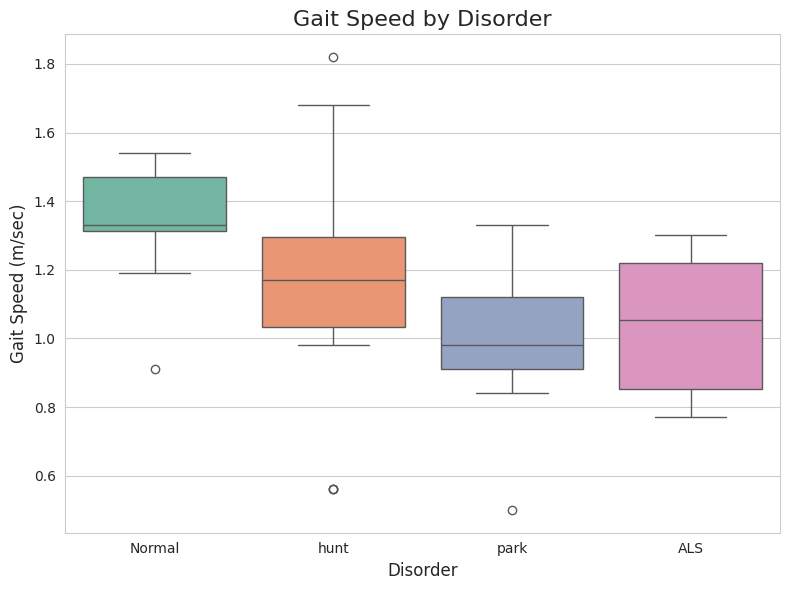

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the boxplot
sns.boxplot(
    data=Demographic_df,
    x='Disorder',
    y='GaitSpeed(m/sec)',
    palette='Set2'
)

# Add titles and labels
plt.title('Gait Speed by Disorder', fontsize=16)
plt.xlabel('Disorder', fontsize=12)
plt.ylabel('Gait Speed (m/sec)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


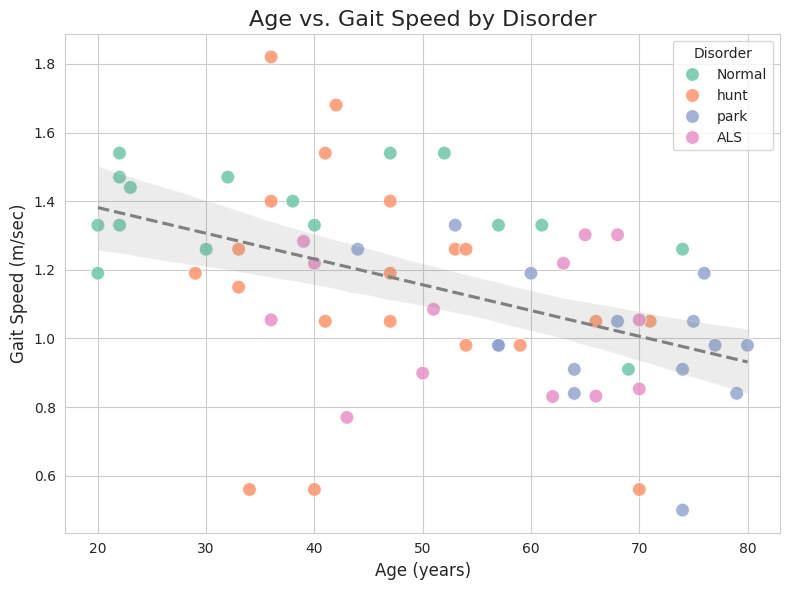

In [ ]:
# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the scatter plot
sns.scatterplot(
    data=Demographic_df,
    x='Age',
    y='GaitSpeed(m/sec)',
    hue='Disorder',  # Color-coded by Disorder
    palette='Set2',
    s=100,  # Marker size
    alpha=0.8  # Transparency
)

# Add a trendline
sns.regplot(
    data=Demographic_df,
    x='Age',
    y='GaitSpeed(m/sec)',
    scatter=False,  # Don't show scatter points (already in scatterplot)
    color='gray',
    line_kws={"linestyle": "dashed"},  # Dashed line for trend
)

# Add titles and labels
plt.title('Age vs. Gait Speed by Disorder', fontsize=16)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Gait Speed (m/sec)', fontsize=12)

# Add legend
plt.legend(title='Disorder', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-58-245b7f73c42a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


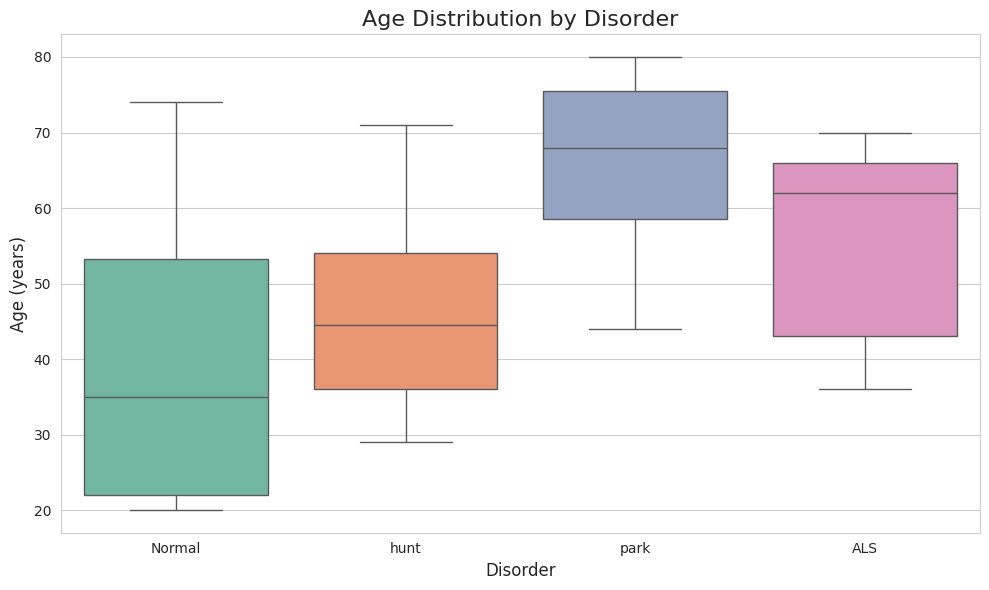

In [ ]:
# Boxplot of Age distribution by Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=Demographic_df,
    x='Disorder',
    y='Age',
    palette='Set2'
)
plt.title('Age Distribution by Disorder', fontsize=16)
plt.xlabel('Disorder', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.tight_layout()
plt.show()


*


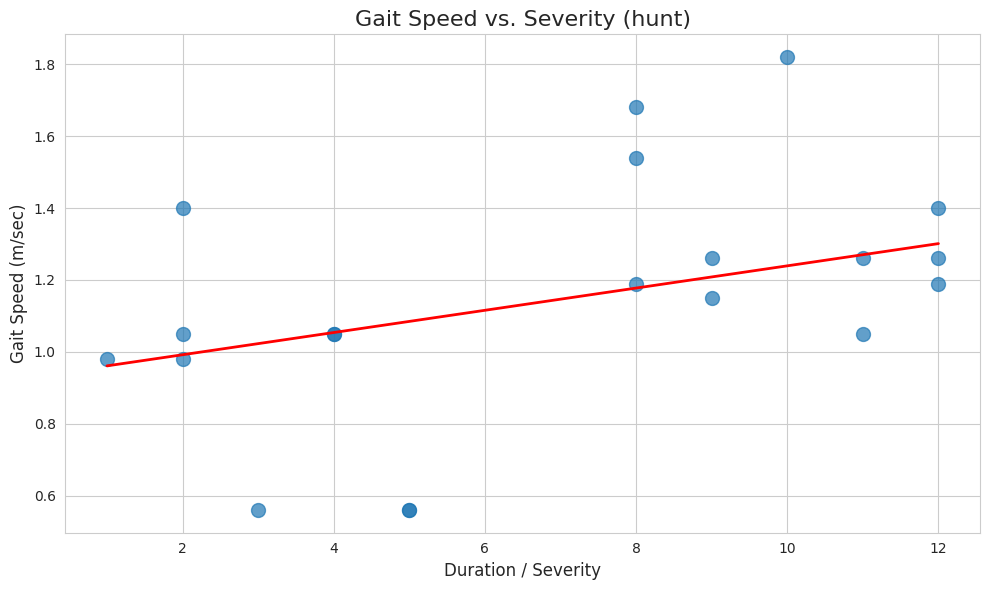

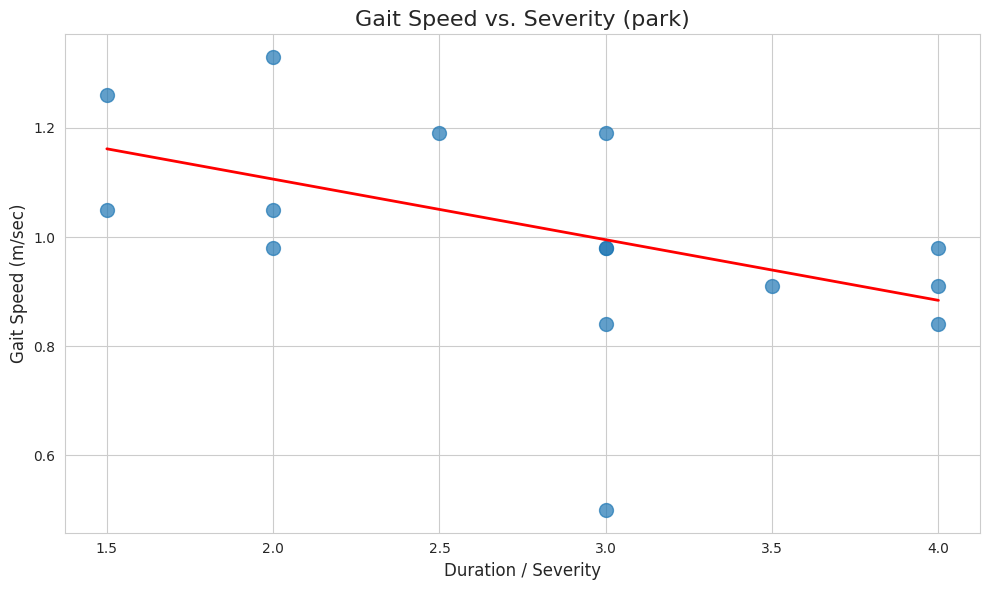

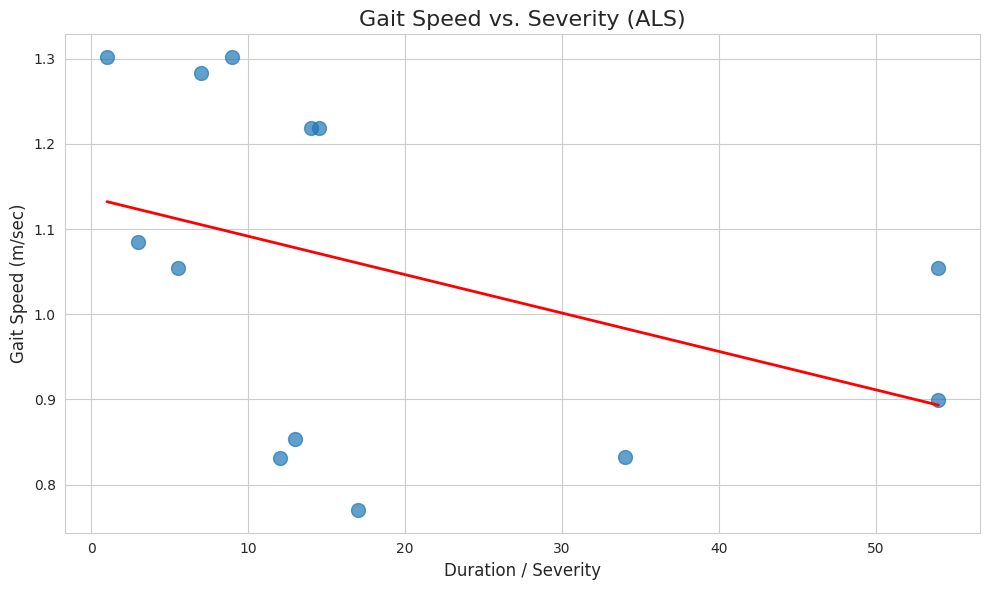

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of unique disorders (excluding 'Normal')
disorders = Demographic_df['Disorder'].unique()
disorders = [disorder for disorder in disorders if disorder != 'Normal']

# Scatter Plot with Trend Line: Gait Speed vs Severity for each disorder
for disorder in disorders:
    disorder_df = Demographic_df[Demographic_df['Disorder'] == disorder]

    plt.figure(figsize=(10, 6))

    # Scatter plot with regression line (trend line)
    sns.regplot(
        data=disorder_df,
        x='Duration/Severity',
        y='GaitSpeed(m/sec)',
        scatter_kws={'s': 100, 'alpha': 0.7},  # Customize scatter points
        line_kws={'color': 'red', 'lw': 2},  # Customize the regression line
        robust=True,  # Makes the line more resistant to outliers
        ci=None  # No confidence interval for the regression line
    )

    plt.title(f'Gait Speed vs. Severity ({disorder})', fontsize=16)
    plt.xlabel('Duration / Severity', fontsize=12)
    plt.ylabel('Gait Speed (m/sec)', fontsize=12)
    plt.tight_layout()
    plt.show()


#Loading the dataset and editing it (pre-proccess) it


*   Time-Series data



In [ ]:
#Time-series dataset
Ts_df = pd.read_csv('all_time_series_data_with_columns.csv')
Ts_df.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride),Group_name
0,22.1933,1.0800,1.0800,0.4133,0.4000,38.27,37.04,0.6667,0.6800,61.73,62.96,0.2667,24.69,hunt5
1,23.3100,1.1167,1.0867,0.4667,0.4267,41.79,39.26,0.6500,0.6600,58.21,60.74,0.2233,20.00,hunt5
2,24.3867,1.0767,1.1300,0.4100,0.4300,38.08,38.05,0.6667,0.7000,61.92,61.95,0.2367,21.98,hunt5
3,25.5433,1.1567,1.1067,0.4467,0.4600,38.62,41.57,0.7100,0.6467,61.38,58.43,0.2500,21.61,hunt5
4,26.6700,1.1267,1.1200,0.4567,0.4033,40.53,36.01,0.6700,0.7167,59.47,63.99,0.2667,23.67,hunt5


In [ ]:
Ts_df.rename(columns={"Group_name": "Subject_ID" },
                                inplace=True)
Ts_df.head()

,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride),Subject_ID
0,22.1933,1.0800,1.0800,0.4133,0.4000,38.27,37.04,0.6667,0.6800,61.73,62.96,0.2667,24.69,hunt5
1,23.3100,1.1167,1.0867,0.4667,0.4267,41.79,39.26,0.6500,0.6600,58.21,60.74,0.2233,20.00,hunt5
2,24.3867,1.0767,1.1300,0.4100,0.4300,38.08,38.05,0.6667,0.7000,61.92,61.95,0.2367,21.98,hunt5
3,25.5433,1.1567,1.1067,0.4467,0.4600,38.62,41.57,0.7100,0.6467,61.38,58.43,0.2500,21.61,hunt5
4,26.6700,1.1267,1.1200,0.4567,0.4033,40.53,36.01,0.6700,0.7167,59.47,63.99,0.2667,23.67,hunt5


In [ ]:
Ts_df.isnull().sum()

,0
Elapsed Time (sec),0
Left Stride Interval (sec),0
Right Stride Interval (sec),0
Left Swing Interval (sec),0
Right Swing Interval (sec),0
Left Swing Interval (% of stride),0
Right Swing Interval (% of stride),0
Left Stance Interval (sec),0
Right Stance Interval (sec),0
Left Stance Interval (% of stride),0


In [ ]:
Ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15160 entries, 0 to 15159
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Elapsed Time (sec)                     15160 non-null  float64
 1   Left Stride Interval (sec)             15160 non-null  float64
 2   Right Stride Interval (sec)            15160 non-null  float64
 3   Left Swing Interval (sec)              15160 non-null  float64
 4   Right Swing Interval (sec)             15160 non-null  float64
 5   Left Swing Interval (% of stride)      15160 non-null  float64
 6   Right Swing Interval (% of stride)     15160 non-null  float64
 7   Left Stance Interval (sec)             15160 non-null  float64
 8   Right Stance Interval (sec)            15160 non-null  float64
 9   Left Stance Interval (% of stride)     15160 non-null  float64
 10  Right Stance Interval (% of stride)    15160 non-null  float64
 11  Do

#Normalization

In [ ]:
numeric_columns = Ts_df.select_dtypes(include=["float64"]).columns

# Apply Min-Max Scaling only on numeric columns
scaler = MinMaxScaler()
Ts_df[numeric_columns] = scaler.fit_transform(Ts_df[numeric_columns])

# Display results
print("Normalized Data (Subject_ID untouched):")
Ts_df.head()

Normalized Data (Subject_ID untouched):


,Elapsed Time (sec),Left Stride Interval (sec),Right Stride Interval (sec),Left Swing Interval (sec),Right Swing Interval (sec),Left Swing Interval (% of stride),Right Swing Interval (% of stride),Left Stance Interval (sec),Right Stance Interval (sec),Left Stance Interval (% of stride),Right Stance Interval (% of stride),Double Support Interval (sec),Double Support Interval (% of stride),Subject_ID
0,0.002430,0.010251,0.009905,0.014545,0.010826,0.411636,0.401002,0.006055,0.006059,0.588364,0.598998,0.023819,0.026173,hunt5
1,0.006440,0.010923,0.010021,0.016786,0.011779,0.450060,0.425710,0.005748,0.005709,0.549940,0.574290,0.023065,0.025109,hunt5
2,0.010306,0.010190,0.010769,0.014406,0.011897,0.409562,0.412243,0.006055,0.006408,0.590438,0.587757,0.023298,0.025558,hunt5
3,0.014459,0.011655,0.010366,0.015946,0.012967,0.415457,0.451419,0.006849,0.005477,0.584543,0.548581,0.023529,0.025474,hunt5
4,0.018505,0.011106,0.010596,0.016366,0.010944,0.436306,0.389538,0.006115,0.006700,0.563694,0.610462,0.023819,0.025941,hunt5


In [ ]:
subject_ids = Ts_df['Subject_ID'].unique()

# Shuffle the order of Subject_IDs
shuffled_subject_ids = np.random.permutation(subject_ids)

# Reorder the rows of df based on the shuffled Subject_IDs
df_shuffled = pd.concat([Ts_df[Ts_df['Subject_ID'] == subject_id] for subject_id in shuffled_subject_ids])

# Reset index after shuffling
df_shuffled = df_shuffled.reset_index(drop=True)

# Now the dataset is shuffled by blocks of Subject_IDs

df_shuffled.head()

df_shuffled.to_csv('shuffled_Ts_data.csv', index=False)  # index=False to avoid saving the index column

# Confirm that the DataFrame was saved
print("Data saved to 'shuffled_Ts_data.csv'")


Data saved to 'shuffled_Ts_data.csv'
